In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [200]:
def load_and_preprocess_images(folder, threshold=252):
    binary_data = []

    for filename in os.listdir(folder):

        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)

        resized_img = cv2.resize(img, (3, 3))

        _, binary_img = cv2.threshold(resized_img, threshold, 1, cv2.THRESH_BINARY)

        binary_vector = binary_img.flatten()

        binary_data.append(binary_vector)

    return np.array(binary_data)

In [201]:
def binary_vector_to_int(binary_vector):
    string_list = []
    for i in binary_vector:
        string_list.append(str(i))
    binary_string = ''.join(string_list)
    return int(binary_string, 2)

In [202]:
zero_folder = '/content/drive/MyDrive/pythonWork/Assigment-2, chit classifier/Prob_Dataset/0s'

zero_binary_data = load_and_preprocess_images(zero_folder)

zero_integer_data = [binary_vector_to_int(binary_vector) for binary_vector in zero_binary_data]

for i, (binary_vector, integer_value) in enumerate(zip(zero_binary_data, zero_integer_data)):
    binary_string = ''.join(str(int(b)) for b in binary_vector)

    print(f"Image {i}:")
    print(f"Binary representation: {binary_vector}")
    print(f"zero_Binary string: {binary_string}")
    print(f"zero_Integer value: {integer_value}")
    print("-" * 30)

Image 0:
Binary representation: [1 1 1 1 1 0 1 1 0]
zero_Binary string: 111110110
zero_Integer value: 502
------------------------------
Image 1:
Binary representation: [1 1 1 1 1 1 1 0 1]
zero_Binary string: 111111101
zero_Integer value: 509
------------------------------
Image 2:
Binary representation: [1 1 1 1 1 1 1 1 1]
zero_Binary string: 111111111
zero_Integer value: 511
------------------------------
Image 3:
Binary representation: [1 0 1 1 1 1 1 1 1]
zero_Binary string: 101111111
zero_Integer value: 383
------------------------------
Image 4:
Binary representation: [1 0 0 1 1 1 1 0 0]
zero_Binary string: 100111100
zero_Integer value: 316
------------------------------
Image 5:
Binary representation: [1 1 1 1 1 1 1 0 1]
zero_Binary string: 111111101
zero_Integer value: 509
------------------------------
Image 6:
Binary representation: [1 1 1 1 1 1 1 1 1]
zero_Binary string: 111111111
zero_Integer value: 511
------------------------------
Image 7:
Binary representation: [1 1 1 1 

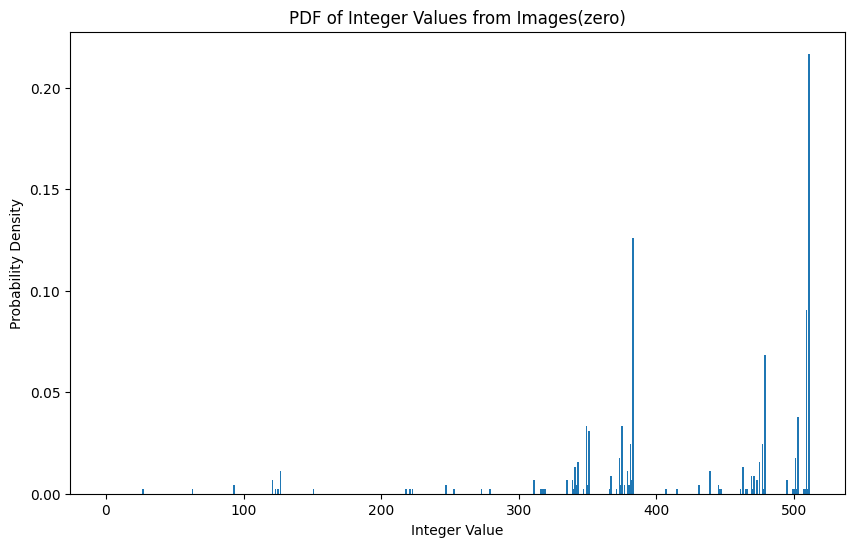

In [203]:
hist, bins = np.histogram(zero_integer_data, bins=range(513), density=True)

plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], hist, width=1)
plt.title('PDF of Integer Values from Images(zero)')
plt.xlabel('Integer Value')
plt.ylabel('Probability Density')
plt.show()

In [204]:
one_folder = '/content/drive/MyDrive/pythonWork/Assigment-2, chit classifier/Prob_Dataset/1s'

one_binary_data = load_and_preprocess_images(one_folder)

one_integer_data = [binary_vector_to_int(binary_vector) for binary_vector in one_binary_data]

for i, (binary_vector, integer_value) in enumerate(zip(one_binary_data, one_integer_data)):
    binary_string = ''.join(str(int(b)) for b in binary_vector)

    print(f"Image {i}:")
    print(f"Binary representation: {binary_vector}")
    print(f"Binary string: {binary_string}")
    print(f"Integer value: {integer_value}")
    print("-" * 30)


Image 0:
Binary representation: [1 1 1 1 0 1 1 1 1]
Binary string: 111101111
Integer value: 495
------------------------------
Image 1:
Binary representation: [0 1 1 1 1 1 1 1 1]
Binary string: 011111111
Integer value: 255
------------------------------
Image 2:
Binary representation: [1 0 1 1 0 1 1 0 1]
Binary string: 101101101
Integer value: 365
------------------------------
Image 3:
Binary representation: [1 0 1 1 0 1 1 1 1]
Binary string: 101101111
Integer value: 367
------------------------------
Image 4:
Binary representation: [1 1 1 1 0 1 0 1 1]
Binary string: 111101011
Integer value: 491
------------------------------
Image 5:
Binary representation: [1 0 1 1 0 1 1 1 1]
Binary string: 101101111
Integer value: 367
------------------------------
Image 6:
Binary representation: [1 0 1 1 0 1 1 1 1]
Binary string: 101101111
Integer value: 367
------------------------------
Image 7:
Binary representation: [1 1 1 1 0 1 1 1 1]
Binary string: 111101111
Integer value: 495
---------------

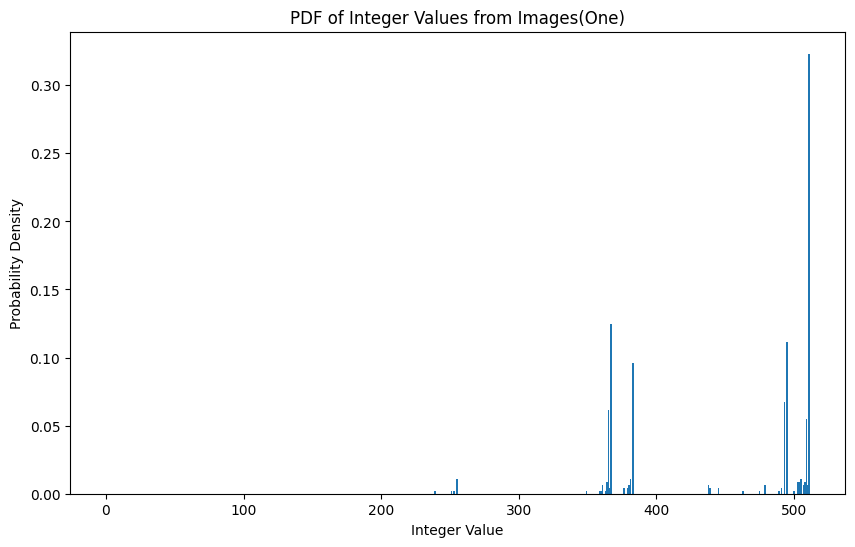

In [205]:
hist, bins = np.histogram(one_integer_data, bins=range(513), density=True)

plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], hist, width=1)
plt.title('PDF of Integer Values from Images(One)')
plt.xlabel('Integer Value')
plt.ylabel('Probability Density')
plt.show()

testing


In [254]:
test_folder = '/content/drive/MyDrive/pythonWork/Assigment-2, chit classifier/Prob_Dataset/test_kaggel_mix'

test_binary_data = load_and_preprocess_images(test_folder)

test_integer_data = [binary_vector_to_int(binary_vector) for binary_vector in test_binary_data]

def calculate_probabilities(test_value, training_data, tolerance):
    count = 0
    for value in training_data:
        if abs(test_value - value) <= tolerance:
            count += 1
    return count / len(training_data)

# index no of image in test folder to be test
test_image_index = 2

tolerance = 5


p_zero = calculate_probabilities(test_integer_data[test_image_index], zero_integer_data, tolerance)
p_one = calculate_probabilities(test_integer_data[test_image_index], one_integer_data, tolerance)

if p_zero > p_one:
    print(f"Image {test_image_index} is classified as zero")
else:
    print(f"Image {test_image_index} is classified as one")

Image 2 is classified as zero


for all the images in the test folder


In [257]:
image_filenames = sorted(os.listdir(test_folder))

for test_image_index in range(len(test_integer_data)):
    test_value = test_integer_data[test_image_index]

    p_zero = calculate_probabilities(test_value, zero_integer_data, tolerance)
    p_one = calculate_probabilities(test_value, one_integer_data, tolerance)

    image_name = image_filenames[test_image_index]

    if p_zero > p_one:
        print(f"Image '{image_name}' is classified as zero")
    else:
        print(f"Image '{image_name}' is classified as one")

    print(f"-" * 30)

Image 'digit_0(0).jpg' is classified as zero
------------------------------
Image 'digit_0(1).jpg' is classified as one
------------------------------
Image 'digit_0(10).jpg' is classified as zero
------------------------------
Image 'digit_0(11).jpg' is classified as zero
------------------------------
Image 'digit_0(12).jpg' is classified as zero
------------------------------
Image 'digit_0(13).jpg' is classified as zero
------------------------------
Image 'digit_0(14).jpg' is classified as one
------------------------------
Image 'digit_0(15).jpg' is classified as one
------------------------------
Image 'digit_0(16).jpg' is classified as zero
------------------------------
Image 'digit_0(17).jpg' is classified as zero
------------------------------
Image 'digit_0(18).jpg' is classified as zero
------------------------------
Image 'digit_0(19).jpg' is classified as zero
------------------------------
Image 'digit_0(2).jpg' is classified as zero
------------------------------
Image

if p(one/image) - p(zero/image) > 0, then the given image is classified as 'one'.
Taking a range of values in zero and one integer data sets to calculate probabilities.

accuracy on a test data set


In [251]:
y_true = []
y_preds = []
for i,filename in enumerate(os.listdir(test_folder)):
    # print(filename[6])
    # filename[6] is to extract digit 0 or 1 from the name of the files to store the true values in y_true, to check accuracy
    # eg filename of my data set images is digit_1/0, so index of 0 or 1 is 6 in this case
    y_true.append(int(filename[6]))


    img = cv2.imread(os.path.join(test_folder, filename), cv2.IMREAD_GRAYSCALE)


    resized_img = cv2.resize(img, (3, 3))

    _, binary_img = cv2.threshold(resized_img, 252, 1, cv2.THRESH_BINARY)

    binary_vector = binary_img.flatten()

    test_integer_data = binary_vector_to_int(binary_vector)

    # p(zero/image)
    p_zero = zero_integer_data.count(test_integer_data) / len(zero_integer_data)
    # p(one/image)
    p_one = one_integer_data.count(test_integer_data) / len(one_integer_data)

    if(p_zero > p_one):
      y_preds.append(0)
    else:
      y_preds.append(1)


In [252]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_preds)
print("Accuracy:", accuracy*100, "%")

Accuracy: 77.22772277227723 %
